In [39]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df = pd.read_csv('voice.csv')

print np.shape(df)
print df.columns

df_male = df[df['label'] == 'male']
df_female = df[df['label'] == 'female']

(3168, 21)
Index([u'meanfreq', u'sd', u'median', u'Q25', u'Q75', u'IQR', u'skew', u'kurt',
       u'sp.ent', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label'],
      dtype='object')


In [40]:
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [41]:
X = df.loc[:, 'meanfreq':'modindx']
y = df.loc[:, 'label']

In [42]:
print np.shape(X)
print np.shape(y)

(3168, 20)
(3168,)


In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print np.shape(x_train)
print np.shape(x_test)
print np.shape(y_train)
print np.shape(y_test)

(2217, 20)
(951, 20)
(2217,)
(951,)


In [15]:
# Fit a gradient boosted classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gbc.fit(x_train, y_train)
preds = gbc.predict(x_test)
print accuracy_score(y_test, preds)

0.976866456362


In [16]:
# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)
preds = rf.predict(x_test)
print accuracy_score(y_test, preds)

0.977917981073


In [17]:
# Fit a logistic regression model
logreg = linear_model.LogisticRegression(C=1e5, penalty='l2')
logreg.fit(x_train, y_train)
preds = logreg.predict(x_test)
print accuracy_score(y_test, preds)

0.970557308097


In [68]:
# Fit an svm classifier)
svmclf = svm.SVC()
svmclf.fit(x_train, y_train)
preds = svmclf.predict(x_test)
print accuracy_score(y_test, preds)

0.712933753943


In [80]:
l = X.as_matrix()

In [20]:
df.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

In [45]:
df_male.describe()

meanfreq           sd       median          Q25          Q75  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean      0.170813     0.065110     0.175299     0.115562     0.226346   
std       0.026254     0.009455     0.037392     0.031999     0.024050   
min       0.039363     0.041747     0.010975     0.000240     0.042946   
25%       0.155625     0.058957     0.149952     0.101205     0.211918   
50%       0.176343     0.061781     0.180612     0.122315     0.228117   
75%       0.190593     0.070915     0.202362     0.136044     0.244819   
max       0.225582     0.096030     0.248840     0.226740     0.268924   

               IQR         skew         kurt       sp.ent          sfm  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean      0.110784     3.295460    48.331698     0.917188     0.471670   
std       0.020415     5.135190   163.115940     0.028938     0.150473   
min       0.021841     0.326033     2.068455     0.786650     0.080963   
25%       0.100960     1.461931     5.003020     0.899557     0.363316   
50%       0.109940     1.880420     6.970088     0.917309     0.461636   
75%       0.119331     2.645467    12.282596     0.936048     0.576902   
max       0.196168    34.537488  1271.353628     0.981997     0.831347   

              mode     centroid      meanfun       minfun       maxfun  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean      0.152022     0.170813     0.115872     0.034175     0.253836   
std       0.084024     0.026254     0.017179     0.015749     0.036003   
min       0.000000     0.039363     0.055565     0.010953     0.103093   
25%       0.098914     0.155625     0.104171     0.017719     0.246154   
50%       0.157557     0.176343     0.117254     0.036166     0.271186   
75%       0.228117     0.190593     0.128236     0.047572     0.277457   
max       0.280000     0.225582     0.179051     0.121212     0.279070   

           meandom       mindom       maxdom      dfrange      modindx  
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000  
mean      0.728877     0.040307     4.358447     4.318139     0.177430  
std       0.445997     0.049199     3.000285     3.000605     0.130132  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.399170     0.007812     1.759766     1.751953     0.099184  
50%       0.686687     0.023438     4.457031     4.429688     0.139904  
75%       1.032536     0.031250     6.035156     6.000000     0.212205  
max       2.805246     0.458984    21.867188    21.843750     0.932374

In [44]:
df_female.describe()

meanfreq           sd       median          Q25          Q75  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean      0.191000     0.049142     0.195942     0.165349     0.223184   
std       0.029960     0.018380     0.032149     0.049767     0.023121   
min       0.078847     0.018363     0.035114     0.000229     0.127637   
25%       0.177031     0.034977     0.181021     0.157892     0.206280   
50%       0.192732     0.041965     0.198226     0.175373     0.223744   
75%       0.211981     0.060452     0.216214     0.195243     0.241486   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean      0.057834     2.984875    24.805224     0.873066     0.344763   
std       0.042924     3.091454    97.669114     0.047288     0.179854   
min       0.014558     0.141735     2.209673     0.738651     0.036876   
25%       0.031106     1.962717     6.764500     0.839784     0.208125   
50%       0.042689     2.435808     9.607635     0.865861     0.277228   
75%       0.061268     3.086396    14.448639     0.908557     0.478122   
max       0.252225    34.725453  1309.612887     0.978482     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean      0.178541     0.191000     0.169742     0.039429     0.263848   
std       0.067175     0.029960     0.018460     0.021845     0.021529   
min       0.000000     0.078847     0.091912     0.009775     0.163934   
25%       0.168883     0.177031     0.157395     0.019116     0.258065   
50%       0.193670     0.192732     0.169408     0.047013     0.274286   
75%       0.218152     0.211981     0.181832     0.048534     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000  
mean      0.929544     0.064987     5.736107     5.671120     0.170073  
std       0.576884     0.072739     3.854042     3.856124     0.107639  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.450566     0.023438     2.560547     2.435547     0.101201  
50%       0.867405     0.023438     6.042969     5.964844     0.138995  
75%       1.338521     0.140625     8.607422     8.531250     0.201557  
max       2.957682     0.449219    21.796875    21.773438     0.857764

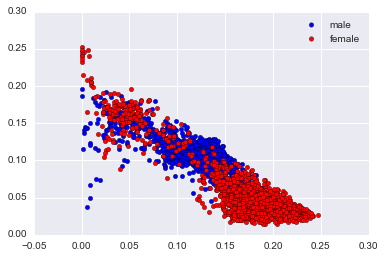

In [19]:
# Visualizations Q25 vs IQR

plt.scatter(df_male.loc[:,'Q25'], df_male.loc[:,'IQR'], c = 'b', s = 20,label = "male")
plt.scatter(df_female.loc[:,'Q25'], df_female.loc[:,'IQR'], c = 'r',s = 20,label = "female")
plt.legend()
plt.show()


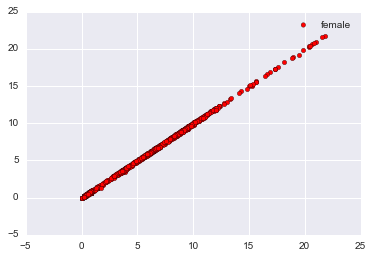

In [23]:
# Visualizations Q25 vs IQR

#plt.scatter(df_male.loc[:,'maxdom'], df_male.loc[:,'dfrange'], c = 'b', s = 20,label = "male")
plt.scatter(df_female.loc[:,'maxdom'], df_female.loc[:,'dfrange'], c = 'r',s = 20,label = "female")
plt.legend()
plt.show()


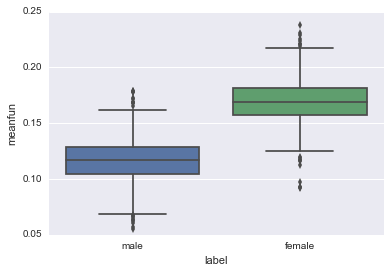

In [37]:
sns.boxplot(x="label", y="meanfun", data=df)
plt.savefig("meanfun.png")

In [91]:
# Predictions based on meanfun threshold

preds = [None] * 3168

for i in xrange(3168):
    if X.loc[i, 'meanfun'] > 0.140:
        preds[i] = 'female'
    else:
        preds[i] = 'male'

print accuracy_score(y, preds)

0.952335858586


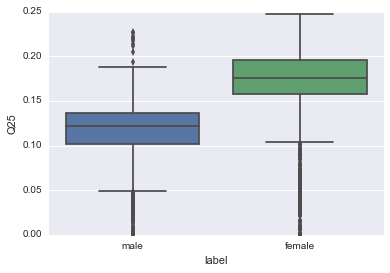

In [36]:
sns.boxplot(x="label", y="Q25", data=df)
plt.savefig("box_Q25.png")

In [92]:
# Predictions based on Q25 threshold

preds = [None] * 3168

for i in xrange(3168):
    if X.loc[i, 'Q25'] > 0.145:
        preds[i] = 'female'
    else:
        preds[i] = 'male'

print accuracy_score(y, preds)

0.864267676768


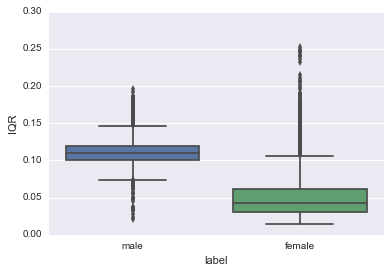

In [35]:
sns.boxplot(x="label", y="IQR", data=df)
plt.savefig("box_IQR.png")

In [93]:
# Predictions based on IQR threshold

preds = [None] * 3168

for i in xrange(3168):
    if X.loc[i, 'Q25'] > 0.09:
        preds[i] = 'male'
    else:
        preds[i] = 'female'

print accuracy_score(y, preds)

0.48327020202


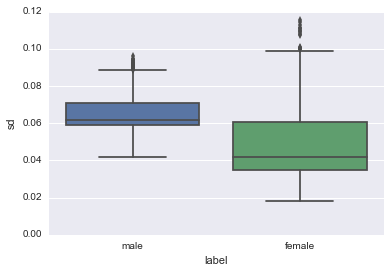

In [47]:
sns.boxplot(x="label", y="sd", data=df)

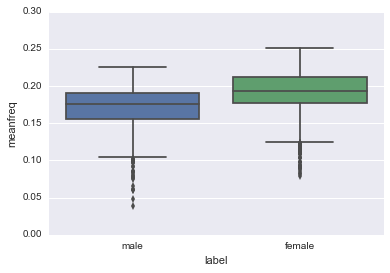

In [46]:
sns.boxplot(x="label", y="meanfreq", data=df)

In [83]:
def perceptron(X, y, maxsteps=100, w = np.random.rand(20,))
    
    i = 1
    while i <= maxsteps
        count = 0                     # counter for no. of misclassified points in the current iteration
        if !random
            for j=1:length(y)             # iterate over the data points
                if (y[j] * (X[j,:]*w) )[1] <= 0. # if the data point is misclassified
                    w = w + y[j]*X[j,:]'     # update the weight vector
                    count += 1            # increment counter
                end
            end
        else                         # random case
            indices = randperm(length(y))
            for j=1:length(indices)
                idx = indices[j]
                if (y[idx] * (X[idx,:]*w) )[1] <= 0. # if the data point is misclassified
                    w = w + y[idx]*X[idx,:]'     # update the weight vector
                    count += 1            # increment counter
                end
            end
        end
                
        if count == 0                 # if there are no misclassifications in the most recent iteration, then stop
            println("No. of iterations taken to converge: $i")
            break
        end
        i += 1
    end
    if i > maxsteps
        println("Perceptron did not converge in the given maximum iterations: $maxsteps")
    end
    return w, i
end

SyntaxError: invalid syntax (<ipython-input-83-55f4042e8bfa>, line 1)

In [88]:
np.random.rand(20,)

array([ 0.6897632 ,  0.6332025 ,  0.32354994,  0.30941616,  0.81141584,
        0.26896266,  0.01619834,  0.14317207,  0.25669791,  0.31678883,
        0.95858471,  0.88578967,  0.55575779,  0.29886207,  0.48362403,
        0.6088484 ,  0.1993637 ,  0.31319547,  0.02960466,  0.15822956])